# Exploratory Data Analysis

### Roles to Explore

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import adjustText
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

### Filter For US Data Analyst Roles

In [8]:
df_DA_USA = df[df['job_country'].isin(['United States']) & df['job_title_short'].isin(['Data Analyst'])]

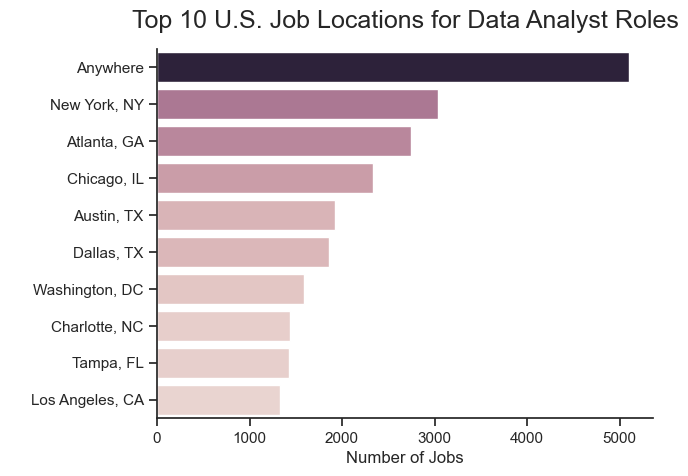

In [43]:
df_plot = df_DA_USA['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', legend=False)
sns.despine()
plt.title('Top 10 U.S. Job Locations for Data Analyst Roles', fontsize=18, pad=15)
plt.xlabel('Number of Jobs')
plt.ylabel(' ')
plt.show()

### Job Opportunities

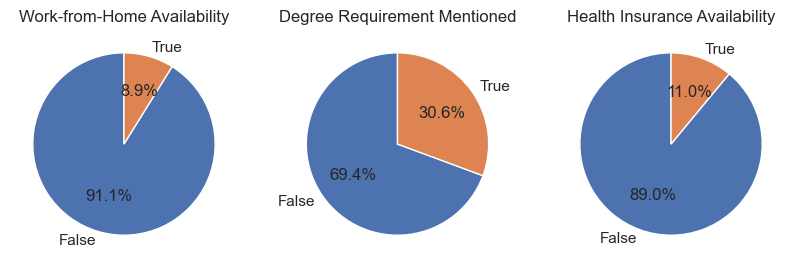

In [55]:
dict_column = {
    'job_work_from_home': 'Work-from-Home Availability',
    'job_no_degree_mention': 'Degree Requirement Mentioned',
    'job_health_insurance': 'Health Insurance Availability'
}

fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False','True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


### Companies to Explore

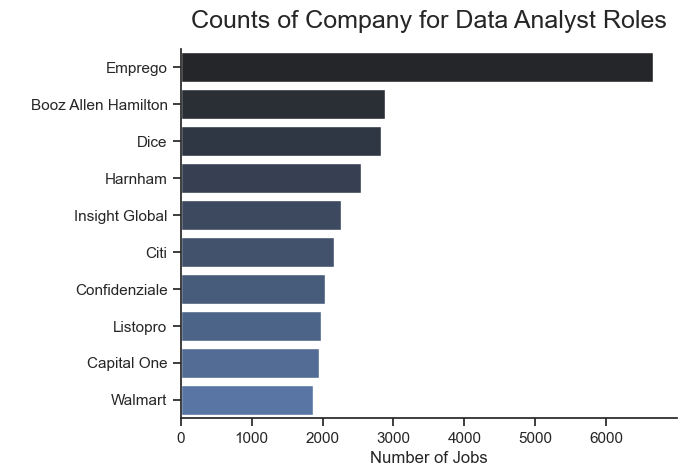

In [73]:
df_plot = df['company_name'].value_counts().head(10).to_frame()
df_plot = df_plot.sort_values('count', ascending=False)

sns.set_theme(style='ticks')

colors = sns.color_palette("dark:b_r", n_colors=len(df_plot))  

sns.barplot(
    data=df_plot,
    x='count',
    y='company_name',
    palette=colors,
    legend=False,
    hue='count'
)

sns.despine()
plt.title('Counts of Company for Data Analyst Roles', fontsize=18, pad=15)
plt.xlabel('Number of Jobs')
plt.ylabel(' ')
plt.show()

### Countries to Explore

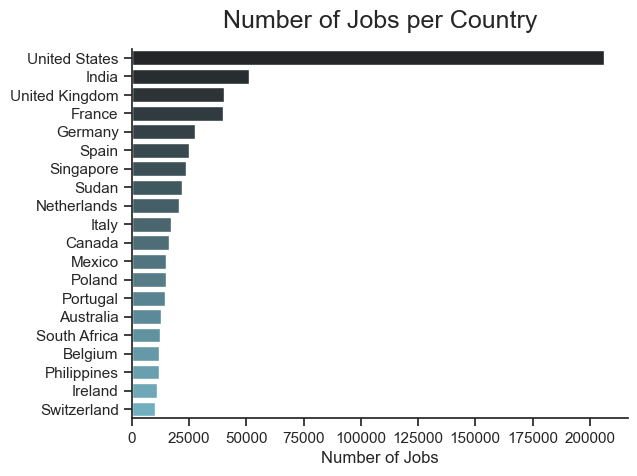

In [84]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')

colors = sns.color_palette("dark:c_r", n_colors=len(df_plot))  

sns.barplot(
    data=df_plot,
    x='count',
    y='job_country',
    palette=colors,
    legend=False,
    hue='count'
)
sns.despine()
plt.title('Number of Jobs per Country', fontsize=18, pad=15)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()